# Week Three Part 2

Ari and Lucas

# Import data and visualize the basic graph as found online

Biadjacency matrix
<Compressed Sparse Row sparse array of dtype 'int64'
	with 89 stored elements and shape (18, 14)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
1

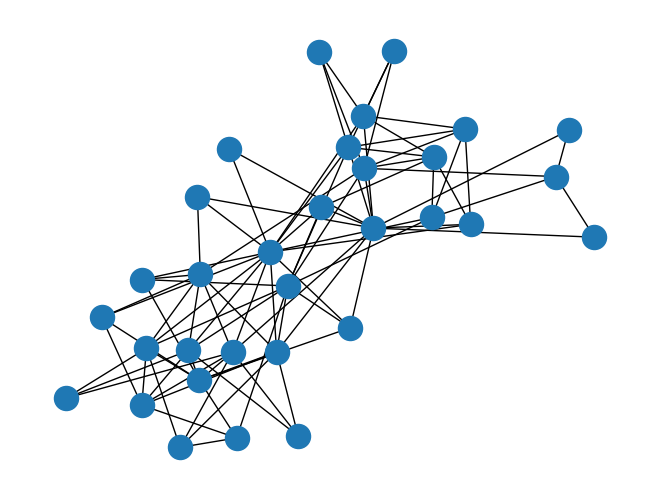

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

Since the graph is bipartite, we can color the network by both, women and club to make better inferences. Additionally, we can compute the degree centralirty of the women and clubs to understand which ones may be important.

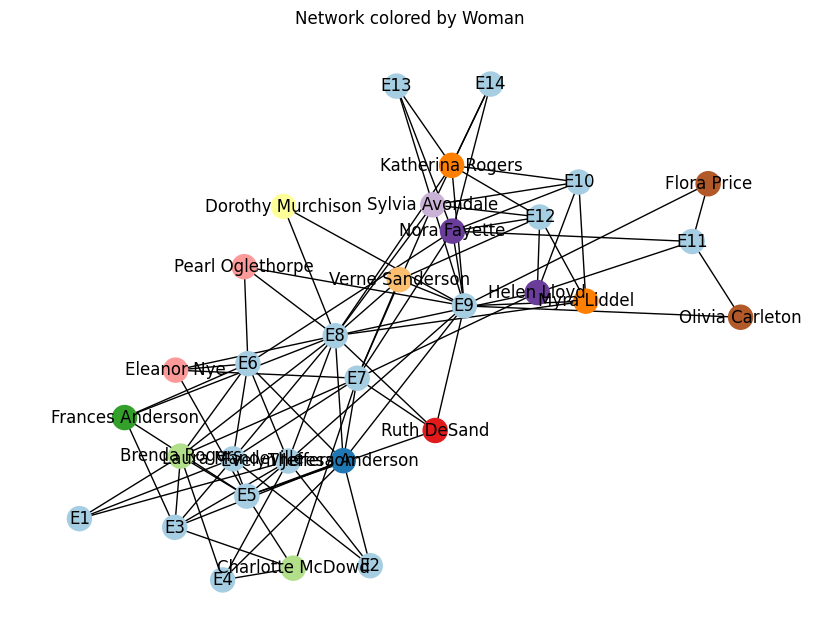

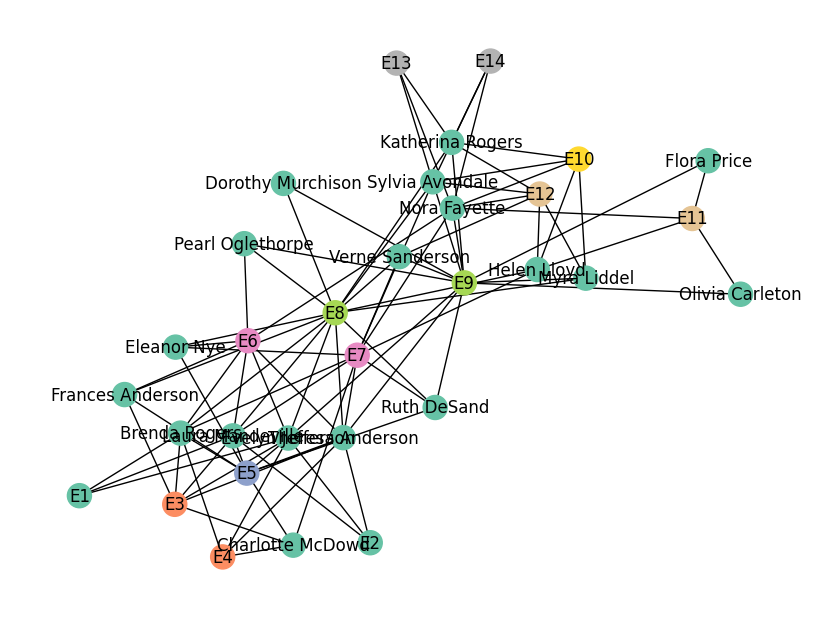

Degree Centrality Women:
Evelyn Jefferson: 0.26
Laura Mandeville: 0.23
Theresa Anderson: 0.26
Brenda Rogers: 0.23
Charlotte McDowd: 0.13
Frances Anderson: 0.13
Eleanor Nye: 0.13
Pearl Oglethorpe: 0.10
Ruth DeSand: 0.13
Verne Sanderson: 0.13
Myra Liddel: 0.13
Katherina Rogers: 0.19
Sylvia Avondale: 0.23
Nora Fayette: 0.26
Helen Lloyd: 0.16
Dorothy Murchison: 0.06
Olivia Carleton: 0.06
Flora Price: 0.06

Degree Centrality Clubs:
E1: centrality.get(c,0):.2f
E2: centrality.get(c,0):.2f
E3: centrality.get(c,0):.2f
E4: centrality.get(c,0):.2f
E5: centrality.get(c,0):.2f
E6: centrality.get(c,0):.2f
E7: centrality.get(c,0):.2f
E8: centrality.get(c,0):.2f
E9: centrality.get(c,0):.2f
E10: centrality.get(c,0):.2f
E11: centrality.get(c,0):.2f
E12: centrality.get(c,0):.2f
E13: centrality.get(c,0):.2f
E14: centrality.get(c,0):.2f


In [2]:
woman_colors = {w: i for i, w in enumerate(women)}
node_colors_woman = [woman_colors.get(node, 0) for node in G.nodes()]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors_woman, cmap=plt.cm.Paired)
plt.title('Network colored by Woman')
plt.show()

club_colors = {c: i for i, c in enumerate(clubs)}
node_colors_clubs = [club_colors.get(node, 0) for node in G.nodes()]
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color=node_colors_clubs, cmap=plt.cm.Set2)
plt.show()

#Network Analysis Women
centrality = nx.degree_centrality(G)
print('Degree Centrality Women:')
for w in women:
    print(f'{w}: {centrality.get(w,0):.2f}')

#Network Analysis Clubs
print('\nDegree Centrality Clubs:')
for c in clubs:
    print(f'{c}: centrality.get(c,0):.2f')


The output above shows usthat the woman with the highest degree centrality, meaning the most connected woman, is a tie between Evelyn Jefferson, Theresa Anderson, and Nora Fayette. Additionally, the most connected club is E8. Looking at the colored network graph, we can see that all three women are connected to club E8. This begs the question whether more connected women are in the more connected clubs. To further investigate this, we can run a correlation between the degree centralities.

Correlation between womans degree centrality and average club degree centrality: -0.62 (p=0.00637)


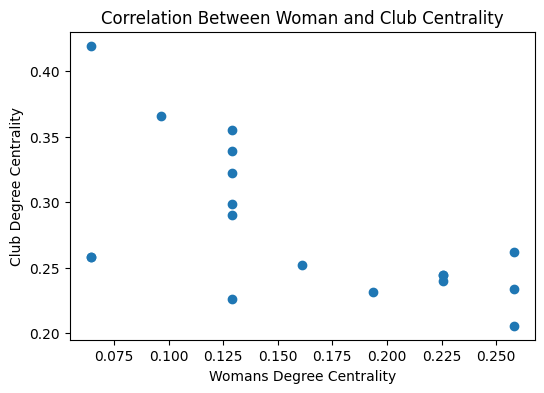

In [8]:
import numpy as np
from scipy.stats import pearsonr

#Get degree centrality for women and clubs
woman_centrality = {w: centrality.get(w,0) for w in women}
club_centrality = {c: centrality.get(c,0) for c in clubs}

woman_avg_club_centrality = {}
for w in women:
    clubs_of_woman = [n for n in G.neighbors(w) if n in clubs]
    if clubs_of_woman: 
        woman_avg_club_centrality[w] = np.mean([club_centrality[c] for c in clubs_of_woman])
    else:
        woman_avg_club_centrality[w] = 0 

woman_centrality_list = []
avg_club_centrality_list = []
for w in women:
    woman_centrality_list.append(woman_centrality[w])
    avg_club_centrality_list.append(woman_avg_club_centrality[w])

corr, pval = pearsonr(woman_centrality_list, avg_club_centrality_list)
print(f'Correlation between womans degree centrality and average club degree centrality: {corr:.2f} (p={pval:.3})')

plt.figure(figsize=(6,4))
plt.scatter(woman_centrality_list, avg_club_centrality_list)
plt.xlabel('Womans Degree Centrality')
plt.ylabel('Club Degree Centrality')
plt.title('Correlation Between Woman and Club Centrality')
plt.show()

Interestingly, the correlation above shows the exact opposite phenomenon as previously assumed: higher club degree centrality correlated with lower woman degree centrality. Of course, the sample size is quite small, nevertheless, this could indicate a structural pattern in the network, such as:

* Highly connected women may be bridging less central clubs, acting as connectors or brokers.
* Well connected clubs may have more members with lower individual centrality, possibly due to their popularity or inclusiveness.